In [1]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.fftpack as fft
import scipy.signal as sig

In [2]:
def get_data(H1):
    data = []
    with open(H1, 'r') as datafile:
        NaNs = 0
        for line in datafile:
            if line[0] == '#':
                print(line[:-1])
            else:
                try: data += [float(line)]
                except ValueError: NaNs += 1
        if NaNs > 0:
            print('Warning:\n ', NaNs, 'lines couldn\'t be interpreted as numbers!\n')
    return np.array(data)

In [3]:
def get_data(L1):
    data = []
    with open(L1, 'r') as datafile:
        NaNs = 0
        for line in datafile:
            if line[0] == '#':
                print(line[:-1])
            else:
                try: data += [float(line)]
                except ValueError: NaNs += 1
        if NaNs > 0:
            print('Warning:\n ', NaNs, 'lines couldn\'t be interpreted as numbers!\n')
    return np.array(data)

# Gravitational wave strain for GW150914_R1 for H1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32


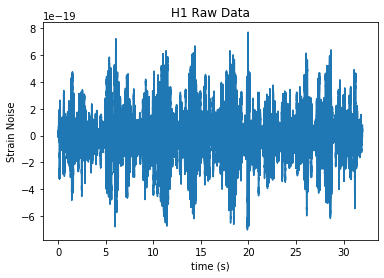

In [4]:
#Plotting the data set for H1 Detector
time=np.arange(0,32,1/4096)
plt.plot(time,get_data("H1.txt"))
plt.title("H1 Raw Data")
plt.xlabel("time (s)")
plt.ylabel("Strain Noise")
plt.show
plt.savefig("H1 raw")

# Gravitational wave strain for GW150914_R1 for L1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32


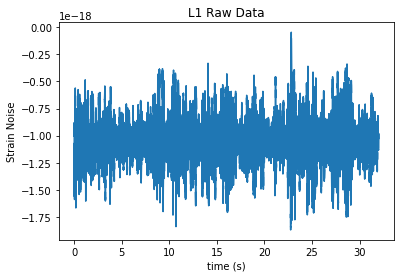

In [5]:
#Plotting the data set for L1 detector
plt.plot(time,get_data("L1.txt"))
plt.title("L1 Raw Data")
plt.xlabel("time (s)")
plt.ylabel("Strain Noise")
plt.show
plt.savefig("L1 raw")

# Gravitational wave strain for GW150914_R1 for H1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for L1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32


/Users/jzhong/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


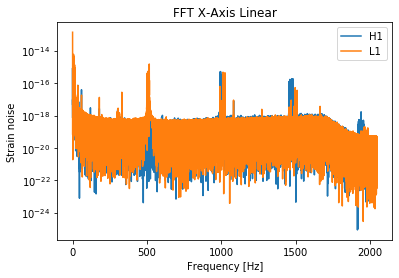

/Users/jzhong/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


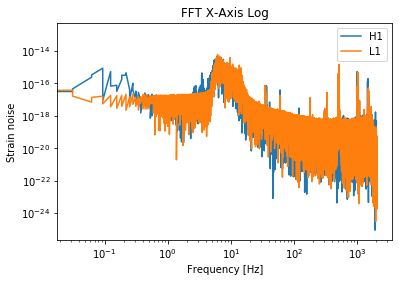

<Figure size 432x288 with 0 Axes>

In [6]:
#Step 2 applying FFT
H1data = get_data("H1.txt")
L1data = get_data("L1.txt")

fourierH1 = fft.rfft(H1data)
fourierL1 = fft.rfft(L1data)

frequency=fft.rfftfreq(131072, 1/4096) 

plt.plot(frequency, abs(fourierH1))
plt.plot(frequency, abs(fourierL1))
plt.yscale('log')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Strain noise")
plt.title("FFT X-Axis Linear")
plt.legend(['H1','L1'])
plt.show()
plt.savefig("FFT X-Axis Linear")

plt.loglog(frequency, abs(fourierH1))
plt.loglog(frequency, abs(fourierL1))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Strain noise")
plt.title("FFT X-Axis Log")
plt.legend(['H1','L1'])
plt.show()
plt.savefig("FFT X-Axis Log")

In [7]:
len(H1data)

131072

In [8]:
#Step 3a
#a function that returns a two second long chunk of data starting from an arbitrary time
def data_chunk_H1(t):
    return get_data("H1.txt")[t*4096:t*4096+2*4096]  #since there are 4096 data points per second
def data_chunk_L1(t):
    return get_data("L1.txt")[t*4096:t*4096+2*4096]

In [9]:
#Step 3b
#Making the list of data chunks
H1chunklist=[]
L1chunklist=[]
for t in np.arange(0,31,1):
    H1chunk=data_chunk_H1(t)
    H1chunklist.append(H1chunk)
for t in np.arange(0,31,1):
    L1chunk=data_chunk_L1(t)
    L1chunklist.append(L1chunk) 
    
#making the list into a numpy array
H1chunkarray = np.asarray(H1chunklist) 
L1chunkarray = np.asarray(L1chunklist)

# Gravitational wave strain for GW150914_R1 for H1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for H1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for H1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for H1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for H1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for H1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for H1 (see http://l

# Gravitational wave strain for GW150914_R1 for L1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for L1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for L1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for L1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for L1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for L1 (see http://losc.ligo.org)
# This file has 4096 samples per second
# starting GPS 1126259447 duration 32
# Gravitational wave strain for GW150914_R1 for L1 (see http://l

In [10]:
#Step 3c
#applying tukey window
Tukey_chunk_H1 = H1chunkarray*sig.windows.tukey(2*4096)
Tukey_chunk_L1 = L1chunkarray*sig.windows.tukey(2*4096)

In [11]:
#Step 3d
#applying FFt
fourier_chunk_H1 = fft.rfft(Tukey_chunk_H1)
fourier_chunk_L1 = fft.rfft(Tukey_chunk_L1)
#finding average
H1Average = np.abs(fourier_chunk_H1).mean(axis=0)
L1Average = np.abs(fourier_chunk_L1).mean(axis=0)

In [12]:
#Step 3e
#Dividing each chunk by the average noise and applying inverse fft
H1_whitened = fft.irfft(fft.rfft(Tukey_chunk_H1)/H1Average)
L1_whitened = fft.irfft(fft.rfft(Tukey_chunk_L1)/L1Average)

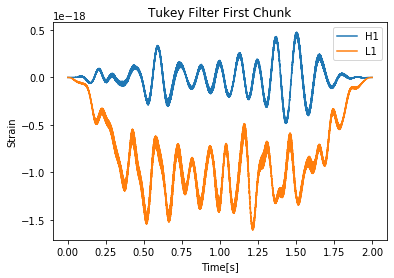

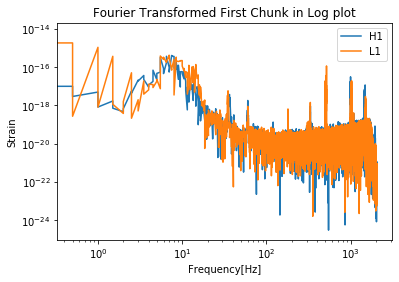

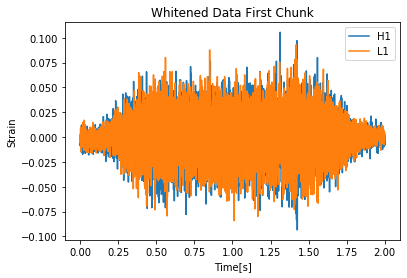

In [13]:
#Plotting chunk 1 after Tukey Filter, Fourier transformation, and whitened
plt.plot(np.arange(0,2,1/4096),Tukey_chunk_H1[0])
plt.plot(np.arange(0,2,1/4096),Tukey_chunk_L1[0])
plt.xlabel('Time[s]')
plt.ylabel('Strain')
plt.legend(['H1','L1'])
plt.title('Tukey Filter First Chunk')
plt.savefig("Tukey")
plt.show()


#Fourier Transformed Chunk
fourier_domain=fft.rfftfreq(8192, 1/4096)
plt.loglog(fourier_domain,abs(fourier_chunk_H1[0]))
plt.loglog(fourier_domain,abs(fourier_chunk_L1[0]))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Strain')
plt.legend(['H1','L1'])
plt.title('Fourier Transformed First Chunk in Log plot')
plt.savefig("Fourier Log")
plt.show()


#Whitened Data Chunk
plt.plot(np.arange(0,2,1/4096),(H1_whitened[14]))
plt.plot(np.arange(0,2,1/4096),(L1_whitened[14]))
plt.xlabel('Time[s]')
plt.ylabel('Strain')
plt.legend(['H1','L1'])
plt.title('Whitened Data First Chunk')
plt.savefig("Whitened")
plt.show()

In [14]:
#Step 4 - Applying band-pass filter
b, a = sig.butter(7,[35.0, 350.0], btype='bandpass', fs=4096.0)
filtered_data_H1 = sig.lfilter(b, a, H1_whitened)
filtered_data_L1 = sig.lfilter(b, a, L1_whitened)

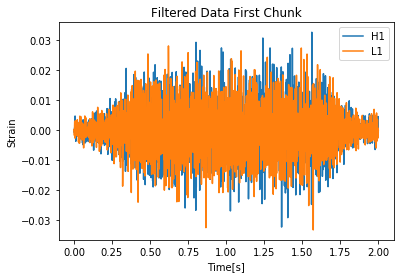

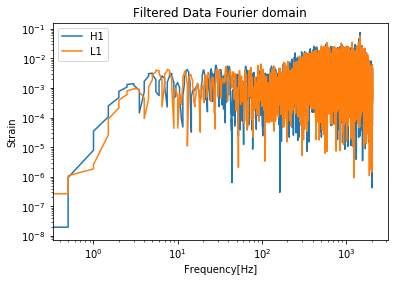

In [15]:
#Plotting the filtered data with respect to time domain and fourier domain.
plt.plot(np.arange(0,2,1/4096),filtered_data_H1[13])
plt.plot(np.arange(0,2,1/4096),filtered_data_L1[13])
plt.xlabel('Time[s]')
plt.ylabel('Strain')
plt.legend(['H1','L1'])
plt.title('Filtered Data First Chunk')
plt.show()

fourier_domain=fft.rfftfreq(8192, 1/4096)
plt.loglog(fourier_domain,abs(filtered_data_H1[14]))
plt.loglog(fourier_domain,abs(filtered_data_L1[14]))
plt.xlabel('Frequency[Hz]')
plt.ylabel('Strain')
plt.legend(['H1','L1'])
plt.title('Filtered Data Fourier domain')
plt.show()


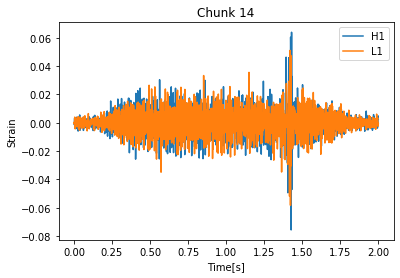

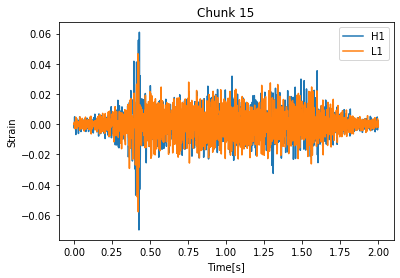

In [16]:
#Step 5 - Finding the signal by plotting each chunk one by one. The signal was found to be in chunk 14/15
plt.plot(np.arange(0,2,1/4096),filtered_data_H1[14])
plt.plot(np.arange(0,2,1/4096),filtered_data_L1[14])
plt.title('Chunk 14')
plt.xlabel('Time[s]')
plt.ylabel('Strain')
plt.legend(['H1','L1'])
plt.show()
plt.plot(np.arange(0,2,1/4096),filtered_data_H1[15])
plt.plot(np.arange(0,2,1/4096),filtered_data_L1[15])
plt.title('Chunk 15')
plt.xlabel('Time[s]')
plt.ylabel('Strain')
plt.legend(['H1','L1'])
plt.show()

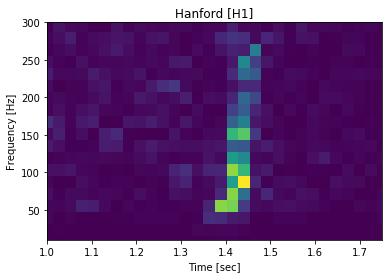

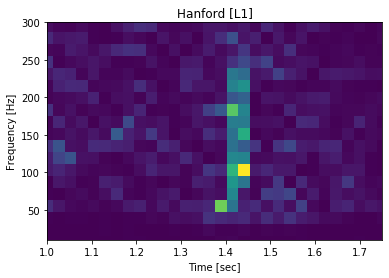

In [17]:
#Step 6 - Spectrogram

f, t, Sxx = sig.spectrogram(filtered_data_H1[14],fs=4096,noverlap=150) 
plt.pcolormesh(t,f,Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(10,300)
plt.xlim(1,1.75)
plt.title('Hanford [H1]')
plt.show()

f, t, Sxx = sig.spectrogram(filtered_data_L1[14],fs=4096,noverlap=150)
plt.pcolormesh(t,f,Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(10,300)
plt.xlim(1,1.75)
plt.title('Hanford [L1]')
plt.show()

In [18]:
#The spectrogram generated is not as clear as the one shown in the lab manual.
#I have tried changing the number of overlapping points but the spectrogram shown
#above was the best I could get. The filtered data also isn't as highly resoluted
#compared to the one shown on the lab manual.

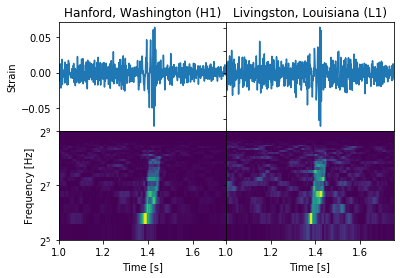

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,gridspec_kw={'hspace': 0, 'wspace': 0})

ax1.plot(np.arange(0,2,1/4096),filtered_data_H1[14])
ax1.set_xlim([1,1.75])
ax1.set(ylabel='Strain')
ax1.set(title='Hanford, Washington (H1)')

ax2.plot(np.arange(0,2,1/4096),filtered_data_L1[14])
ax2.set_xlim([1,1.75])
ax2.set(title='Livingston, Louisiana (L1)')

f, t, Sxx = sig.spectrogram(filtered_data_H1[14],fs=4096,noverlap=254) #max 255
ax3.pcolormesh(t,f,Sxx)
ax3.set_ylim([32,512])
ax3.set_xlim([1,1.75])
ax3.set_yscale('log',basey=2)
ax3.set(ylabel='Frequency [Hz]')

f, t, Sxx = sig.spectrogram(filtered_data_L1[14],fs=4096,noverlap=254) #max 255
ax4.pcolormesh(t,f,Sxx)
ax4.set_ylim([32,512])
ax4.set_xlim([1,1.75])
ax4.set_yscale('log',basey=2)

for ax in fig.get_axes():
    ax.set(xlabel='Time [s]')

for ax in fig.get_axes():
    ax.label_outer()
    
#txt="Gravitational wave strains for GW150914_R1 for H1 and L1 from \nLIGO were filtered and whitened. The top row demonstrate the \nfiltered data and the bottom row shows the spectrogram of the signal"

#plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig("Final.pdf", bbox_inches="tight")